# Importando pacotes, extração arquivo e configurações do pandas.

In [1]:
#Importando os pacotes que serão utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Configurações do Pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
url = 'https://drive.google.com/uc?export=download&id=1v-dcl62QdSo42ZcP7Mron9N5SIG-TkrV'
df_original = pd.read_csv(url, delimiter=',')

# Tratamentos

#### Convertida as colunas 'Gross' e 'Runtime' para tipo numérico

In [4]:
#Preenchido valores nulos do faturamento para 0 e foi convertida a coluna para inteiro
df_original['Gross'] = df_original['Gross'].fillna(0)
df_original['Gross'] = pd.to_numeric(df_original['Gross'].str.replace(',', ''), errors='coerce')

#Corrigida e convertida a coluna Runtime para tipo numerico.
df_original['Runtime'] = pd.to_numeric(df_original['Runtime'].str.replace(' min', ''), errors='coerce')

# Analise de dados exploratória

#### Insights:
  
- O dataset está ranqueado pela nota do IMDB, nota essa que é dada pelo público geral. Temos também a nota do Metacritic(Meta_score), porém, diferente do IMDB, essa nota é dada por críticos de cinema.  
- A nota do IMDB e numero de votos têm uma correlação positiva moderada(0.48), quando numero de votos aumenta, geralmente a nota do IMDB também aumenta. Acredito que pessoas com voto positivo tendem a expressar seu voto indo dar nota no site.
- Nota do IMDB e Metacritic a correlação é positiva mais fraca, uma parte das notas dos criticos constumam ser parecidas com o público geral.
- Conjunto de gênero Ação/Aventura/Sci-fi tem maiores soma do faturamentos dos filmes.
- Filmes de drama e romance são mais frequentes, acredito que por ser mais simples de se fazer.
- Conjunto de gênero Animation/Drama/Guerra é o que tem maior nota média do IMDB.  
- Existem cem anos diferentes nos dados.

A) Qual filme você recomendaria para uma pessoa que você não conhece?  
 - Recomendaria o filme "O poderoso chefão" já que é o filme com a melhor nota do público do IMDB

B) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?  
 - A popularidade de um filme é um fator de alta expactativa de faturamento, quanto mais votos registrados mais 
 popular é o filme.

C) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?  
 - Quanto mais votos registrados mais popular é o filme e mais faturamento o filme tem.

#### Explorando as 10 primeiras linhas

In [5]:
# Explorando as primeiras linhas
df_original.head(10)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.00
5,6,Pulp Fiction,1994,A,154,"Crime, Drama",8.90,"The lives of two mob hitmen, a boxer, a gangst...",94.00,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.00
6,7,Schindler's List,1993,A,195,"Biography, Drama, History",8.90,"In German-occupied Poland during World War II,...",94.00,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.00
7,8,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.80,A thief who steals corporate secrets through t...,74.00,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.00
8,9,Fight Club,1999,A,139,Drama,8.80,An insomniac office worker and a devil-may-car...,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.00
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",8.80,A meek Hobbit from the Shire and eight compani...,92.00,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.00


#### Verificando schema do dataset

In [6]:
#Verificando o Schema do dataset
df_original.info()


#Coluna 'Runtime' precisa converter para tipo numerico
#Coluna 'Gross' precisa converter para tipo numerico já que é o valor do faturamento


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


#### Verificando dados nulos

In [7]:
#Verificando dados nulos
df_original.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
#Verificando valores únicos
#- Cem diferentes anos estão presentes no dataset

df_original.nunique()

Unnamed: 0       999
Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

#### Verificando medidas estatísticas básicas

In [9]:
#Verificando medidas estatísticas
df_original.describe()

,Unnamed: 0,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.00,999.00,999.00,842.00,999.00,830.00
mean,500.00,122.87,7.95,77.97,271621.42,68082574.10
std,288.53,28.10,0.27,12.38,320912.62,109807553.39
min,1.00,45.00,7.60,28.00,25088.00,1305.00
25%,250.50,103.00,7.70,70.00,55471.50,3245338.50
50%,500.00,119.00,7.90,79.00,138356.00,23457439.50
75%,749.50,137.00,8.10,87.00,373167.50,80876340.25
max,999.00,321.00,9.20,100.00,2303232.00,936662225.00


## Analise estatística

### Qual gênero tem maior frequencia, maior nota do IMDB e faturamento?

In [10]:
#Contagem de frenquencia do gênero de filmes. 

df_cont_genero = df_original.groupby(['Genre']).size().reset_index(name='Contagem')
df_cont_genero = df_cont_genero.sort_values(by='Contagem', ascending=False)
print(df_cont_genero)

                             Genre  Contagem
137                          Drama        84
172                 Drama, Romance        37
100                  Comedy, Drama        35
105         Comedy, Drama, Romance        31
22            Action, Crime, Drama        30
132         Crime, Drama, Thriller        28
87       Biography, Drama, History        28
129          Crime, Drama, Mystery        27
122                   Crime, Drama        26
67    Animation, Adventure, Comedy        24
11       Action, Adventure, Sci-Fi        21
84         Biography, Crime, Drama        16
182                     Drama, War        15
95            Comedy, Crime, Drama        15
4         Action, Adventure, Drama        14
179                Drama, Thriller        14
93                          Comedy        13
85                Biography, Drama        12
62    Animation, Action, Adventure        11
24         Action, Crime, Thriller        10
2        Action, Adventure, Comedy        10
90        

In [11]:
#Top generos com maior faturamento

df_genero_faturamento = df_original.groupby('Genre')['Gross'].sum().reset_index()
df_genero_faturamento = df_genero_faturamento.sort_values(by='Gross', ascending=False)
df_genero_faturamento['Gross'] = df_genero_faturamento['Gross'] / 1_000_000_000
print(df_genero_faturamento)

                             Genre  Gross
11       Action, Adventure, Sci-Fi   5.90
67    Animation, Adventure, Comedy   4.50
4         Action, Adventure, Drama   2.67
6       Action, Adventure, Fantasy   2.12
62    Animation, Action, Adventure   2.01
137                          Drama   1.99
172                 Drama, Romance   1.96
2        Action, Adventure, Comedy   1.92
22            Action, Crime, Drama   1.31
87       Biography, Drama, History   1.27
132         Crime, Drama, Thriller   1.26
55      Adventure, Family, Fantasy   1.22
0                Action, Adventure   1.15
100                  Comedy, Drama   0.94
84         Biography, Crime, Drama   0.94
12     Action, Adventure, Thriller   0.84
105         Comedy, Drama, Romance   0.80
129          Crime, Drama, Mystery   0.78
69    Animation, Adventure, Family   0.73
122                   Crime, Drama   0.63
90         Biography, Drama, Sport   0.62
93                          Comedy   0.62
85                Biography, Drama

In [12]:
#IMDB_Rating

df_genero_imdb = df_original.groupby('Genre')['IMDB_Rating'].mean().reset_index()
df_genero_imdb = df_genero_imdb.sort_values(by='IMDB_Rating', ascending=False)
print(df_genero_imdb)

                             Genre  IMDB_Rating
80           Animation, Drama, War         8.50
166                 Drama, Musical         8.40
34                  Action, Sci-Fi         8.40
171            Drama, Mystery, War         8.35
201                        Western         8.35
127            Crime, Drama, Music         8.30
197     Mystery, Romance, Thriller         8.30
59    Adventure, Mystery, Thriller         8.30
144         Drama, Fantasy, Horror         8.30
116       Comedy, Musical, Romance         8.30
131           Crime, Drama, Sci-Fi         8.30
141           Drama, Family, Sport         8.25
138                  Drama, Family         8.23
6       Action, Adventure, Fantasy         8.20
20         Action, Comedy, Romance         8.20
115         Comedy, Music, Romance         8.20
143        Drama, Fantasy, History         8.20
53           Adventure, Drama, War         8.20
148            Drama, Fantasy, War         8.20
29            Action, Drama, Sport      

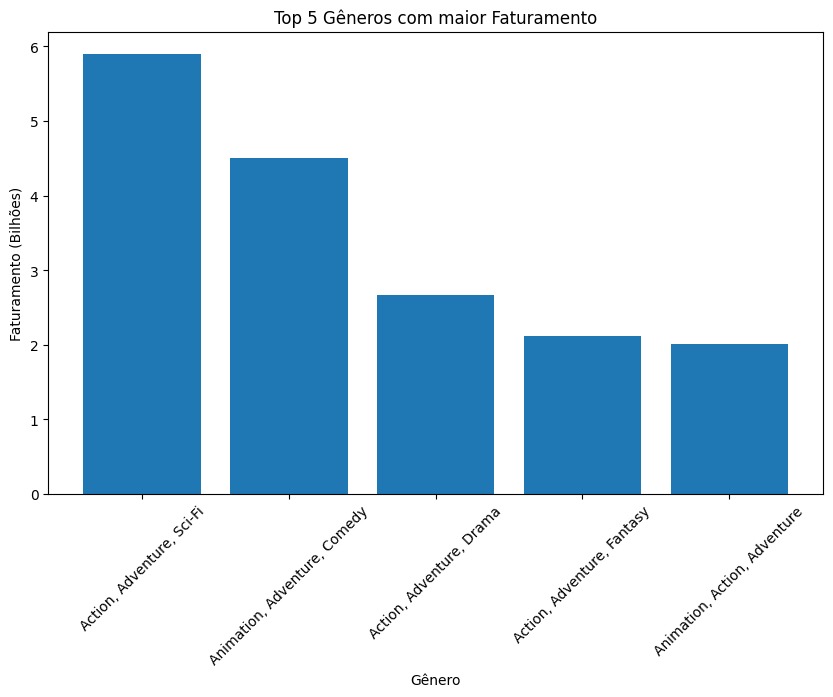

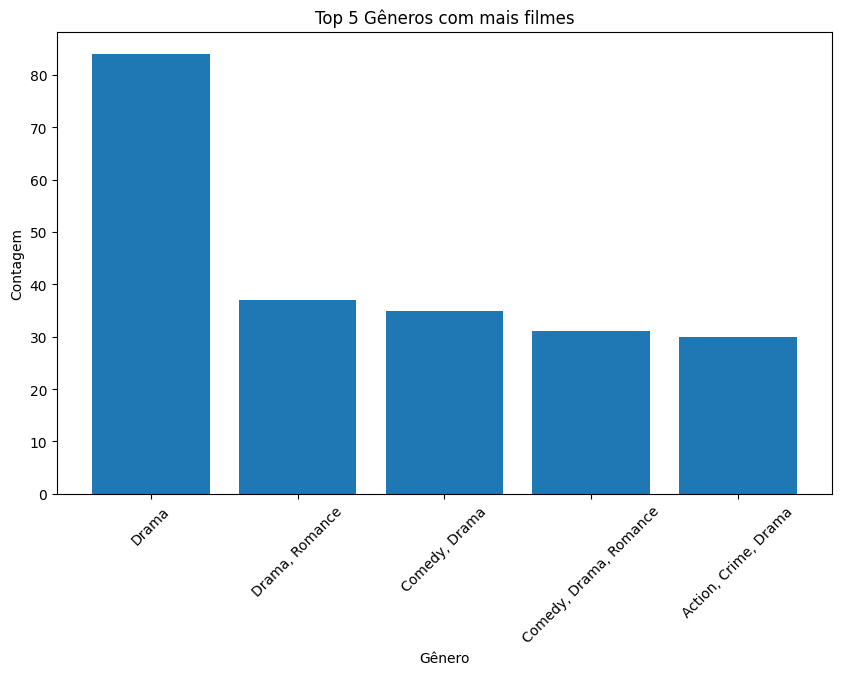

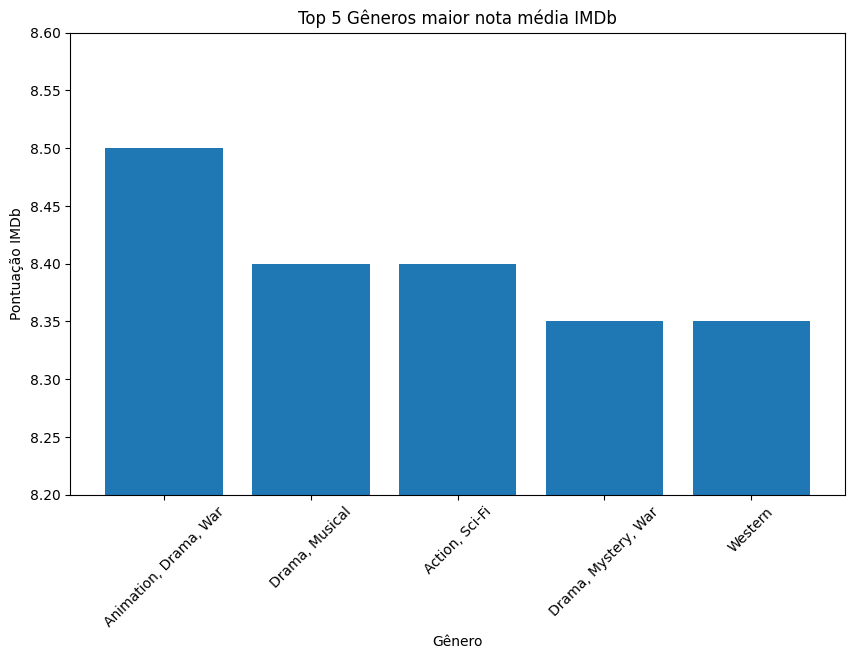

In [13]:
top5_generos_maiorfaturamento = df_genero_faturamento.head(5)
top5_generos_frequentes = df_cont_genero.head(5)
top5_generos_imdb = df_genero_imdb.head(5)

# Gráfico 1: Top 5 Gêneros por Faturamento
plt.figure(figsize=(10, 6))
plt.bar(top5_generos_maiorfaturamento['Genre'], top5_generos_maiorfaturamento['Gross'])
plt.xlabel('Gênero')
plt.ylabel('Faturamento (Bilhões)')
plt.title('Top 5 Gêneros com maior Faturamento')
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Top 5 Gêneros mais Frequentes
plt.figure(figsize=(10, 6))
plt.bar(top5_generos_frequentes['Genre'], top5_generos_frequentes['Contagem'])
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Top 5 Gêneros com mais filmes')
plt.xticks(rotation=45)
plt.show()

# Gráfico 3: Top 5 Gêneros pelo IMDb
plt.figure(figsize=(10, 6))
plt.bar(top5_generos_imdb['Genre'], top5_generos_imdb['IMDB_Rating'])
plt.xlabel('Gênero')
plt.ylabel('Pontuação IMDb')
plt.title('Top 5 Gêneros maior nota média IMDb')
plt.xticks(rotation=45)
plt.ylim(8.2,8.6)
plt.show()

### Mapa de calor para identificar correlação.

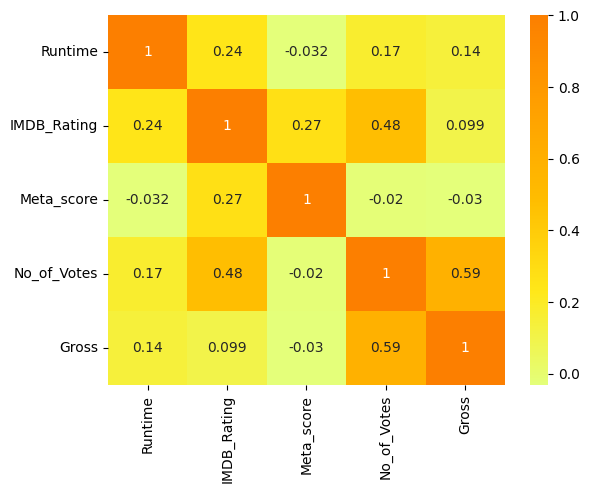

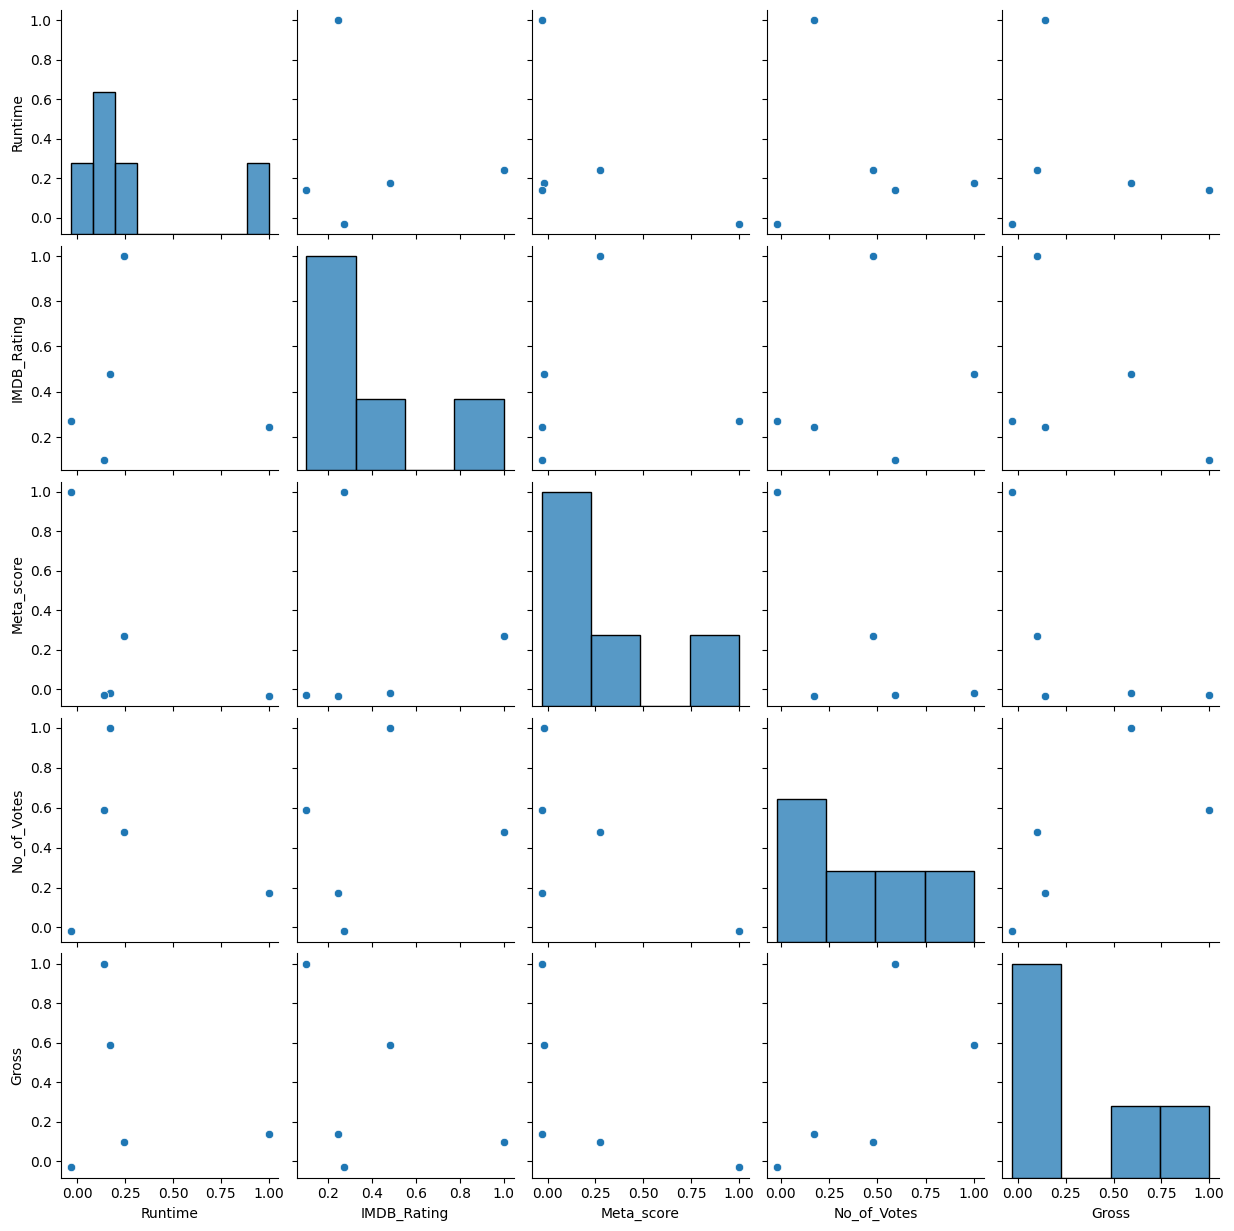

In [14]:
#Verificando a possivel correlação entre as váriaveis numéricas.
colunas_numericas = df_original.select_dtypes(include=['float64', 'int64'])
colunas_numericas = colunas_numericas.drop(columns=['Unnamed: 0'])

tabela = colunas_numericas.corr()
sns.heatmap(tabela, annot=True, cmap='Wistia')
plt.show()

sns.pairplot(tabela)
plt.show()

### Pergunta  1: Qual filme você recomendaria para uma pessoa que você não conhece?

# Modelos de ML

In [15]:
# Separando o dataset entre variaveis categóricas e continuas

df_copia = df_original.copy()

continuas = df_copia.select_dtypes(include=['int64', 'float64'])
categoricas = df_copia.select_dtypes(include=['object', 'category'])

In [16]:
continuas.head()

,Unnamed: 0,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1,175,9.20,100.00,1620367,134966411.00
1,2,152,9.00,84.00,2303232,534858444.00
2,3,202,9.00,90.00,1129952,57300000.00
3,4,96,9.00,96.00,689845,4360000.00
4,5,201,8.90,94.00,1642758,377845905.00


In [17]:
categoricas.head()

,Series_Title,Released_Year,Certificate,Genre,Overview,Director,Star1,Star2,Star3,Star4
0,The Godfather,1972,A,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
1,The Dark Knight,2008,UA,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
2,The Godfather: Part II,1974,A,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
3,12 Angry Men,1957,U,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
4,The Lord of the Rings: The Return of the King,2003,U,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom


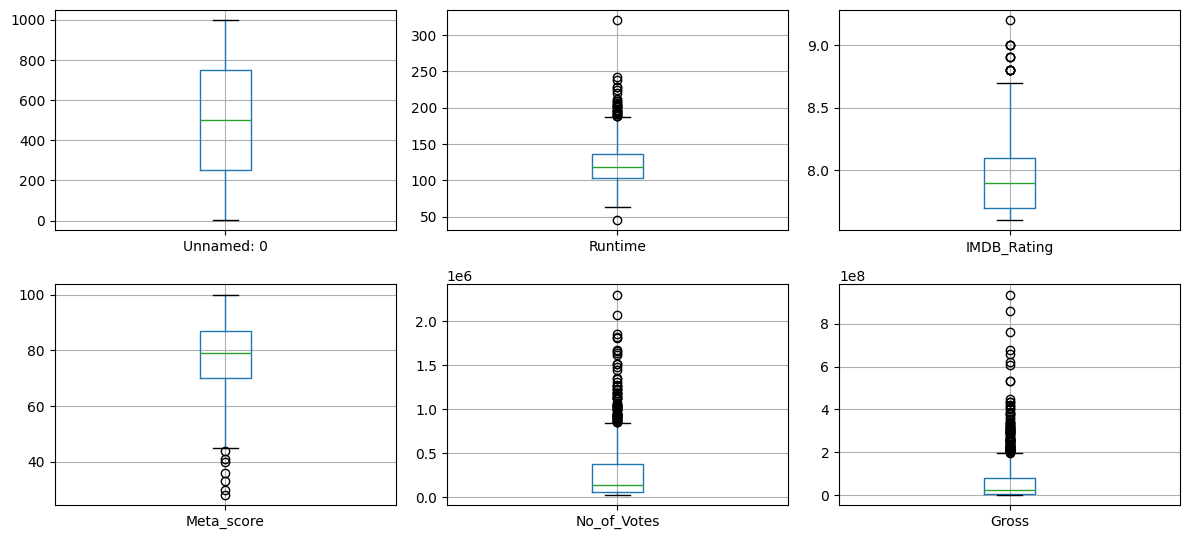

In [18]:
#Plot das variáveis continuas

#Tamanho da área da plotagem
fig = plt.figure(figsize= (12, 8))

#Loop pelas variaveis para gerar os gráficos boxplot
for i, col in enumerate(continuas):
    plt.subplot(3,3,i+1);
    df_copia.boxplot(col);
    plt.tight_layout()
plt.savefig('boxplot.png')

#Existem muitos possíveis Outlayers

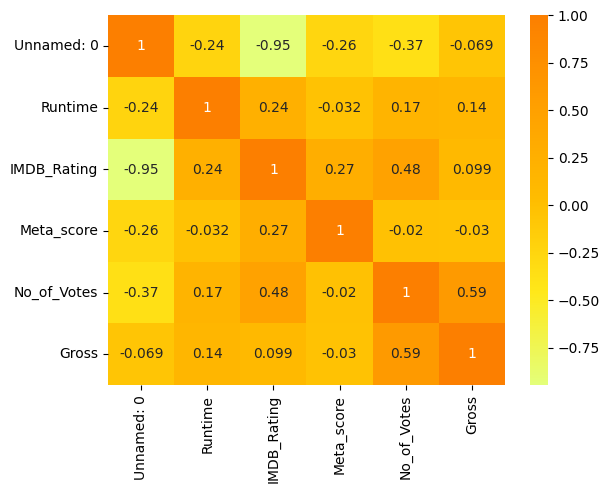

In [19]:
#Mapa de calor para detectar correlação
sns.heatmap(continuas.corr(), annot=True, cmap='Wistia')
plt.show()
#Numero de votos e Faturamento parecem ter uma correlação moderadamente forte

In [20]:
#Somente 4 notas com 9 ou mais.
continuas['IMDB_Rating'].value_counts()

IMDB_Rating
7.70    157
7.80    151
8.00    141
8.10    127
7.60    123
7.90    106
8.20     67
8.30     44
8.40     31
8.50     20
8.60     15
8.80      5
8.70      5
9.00      3
8.90      3
9.20      1
Name: count, dtype: int64

In [21]:
continuas['Gross/Mi'] = continuas['Gross'] / 1000000
continuas['No_of_Votes/Mi'] = continuas['No_of_Votes'] / 1000000
continuas.head()

,Unnamed: 0,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Gross/Mi,No_of_Votes/Mi
0,1,175,9.20,100.00,1620367,134966411.00,134.97,1.62
1,2,152,9.00,84.00,2303232,534858444.00,534.86,2.30
2,3,202,9.00,90.00,1129952,57300000.00,57.30,1.13
3,4,96,9.00,96.00,689845,4360000.00,4.36,0.69
4,5,201,8.90,94.00,1642758,377845905.00,377.85,1.64


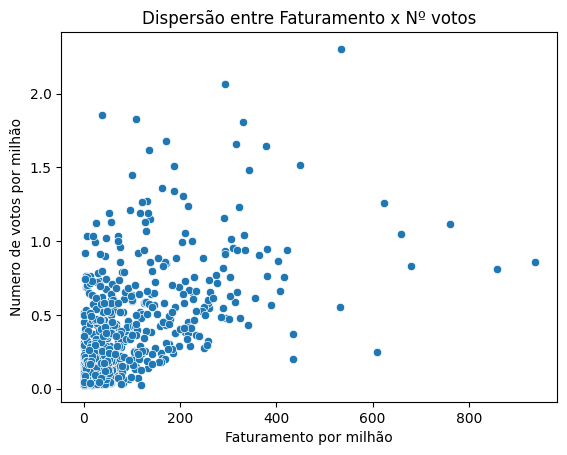

In [22]:
sns.scatterplot(data=continuas, x='Gross/Mi', y='No_of_Votes/Mi')
plt.title('Dispersão entre Faturamento x Nº votos')
plt.xlabel('Faturamento por milhão')
plt.ylabel('Numero de votos por milhão')
plt.show()

In [23]:
#Exclusão das colunas que não serão usadas e preenchimento da média do faturamento nos valores nulos.
continuas = continuas.drop(columns=['Gross/Mi', 'No_of_Votes/Mi'])
media_faturamento = continuas['Gross'].mean()
continuas['Gross'].fillna(media_faturamento, inplace=True)

In [24]:
#Checar valores nulos
continuas.isnull().sum()
continuas = continuas.dropna()


In [25]:
continuas.isnull().sum()

Unnamed: 0     0
Runtime        0
IMDB_Rating    0
Meta_score     0
No_of_Votes    0
Gross          0
dtype: int64

In [26]:
continuas.head()

,Unnamed: 0,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1,175,9.20,100.00,1620367,134966411.00
1,2,152,9.00,84.00,2303232,534858444.00
2,3,202,9.00,90.00,1129952,57300000.00
3,4,96,9.00,96.00,689845,4360000.00
4,5,201,8.90,94.00,1642758,377845905.00


## Modelos de Regressão Linear

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Dividindo os dados de treinamento e teste
y = continuas['IMDB_Rating'] #Variável dependente
x = continuas.drop(columns=['IMDB_Rating', 'Unnamed: 0']) #variável independentes


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Treinar o modelo
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#Avaliação do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 0.21
R²: 0.50


In [28]:
'''
{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
'''
#Previsão do desafio
runtime = 142
meta_score = 80.0
numero_votos = 2343110
faturamento = 28341469
y_pred = model.predict([[runtime, meta_score, numero_votos, faturamento]])
print(f"A nota do IMDB estimada para o Filme 'The Shawshank Redemption' foi {(y_pred)}.")

A nota do IMDB estimada para o Filme 'The Shawshank Redemption' foi [9.24906126].


c:\Users\Fernando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Modelo RandomForest

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dividindo os dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criando uma instância do RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com os dados de treinamento
rf_model.fit(x_train, y_train)

# Fazendo previsões nos dados de teste
y_pred_rf = rf_model.predict(x_test)

# Avaliando o modelo
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE (Random Forest): {rmse_rf:.2f}")
print(f"Coeficiente de determinação(R²) (Random Forest): {r2_rf:.2f}")

y_pred_rf = rf_model.predict([[runtime, meta_score, numero_votos, faturamento]])
print(f"A nota do IMDB estimada para o Filme 'The Shawshank Redemption' foi {y_pred_rf}")


RMSE (Random Forest): 0.19
Coeficiente de determinação(R²) (Random Forest): 0.57
A nota do IMDB estimada para o Filme 'The Shawshank Redemption' foi [8.759]


c:\Users\Fernando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
import pickle

with open('modelo_randomforest.pkl', 'wb') as arquivo:
    pickle.dump(rf_model, arquivo)